### INTRODUCTION
When customers or subscribers stop doing business with a company or service, it is known as customer churn. Customers in the telecom sector can choose from a wide range of service providers and actively swap between them. The telecommunications industry has a 15 to 25% yearly turnover rate in this fiercely competitive market. One of the biggest threats to revenue loss in the telecom sector is customer churn. Fostering customer loyalty is essential since the cost of recruiting new customers can be up to 25 times higher than the cost of keeping existing ones.
For the Dataset we going to work with it will enable us predict a customers churn depending on the consumer information feed to our model.

The Dataset contains the following columns:RowNumber,CustomerId,Surname,CreditScore,Georaphy,Gender,Age,Tenure,Balance,NumOfProdcuts,HasCrCard,IsActiveMember,EstimatedSalary,Exited.

The dependent Variable is Exited which we will use to observe the outcome while the independent variables are the other columns which will enable us to get an outcome. 


In [1]:
#import the required libraries
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sb
import matplotlib.pyplot as plt
import pickle

from warnings import filterwarnings 
filterwarnings("ignore")

In [2]:
#load the data 
df = pd.read_csv(" Churn_Modelling.csv")

In [3]:
#view the columns
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#dropping columns that wont be needed 
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


The dataset doesn't have any null values so no need for cleaning 

In [6]:
#check for null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There no null values

In [7]:
#preprocessing data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder , StandardScaler
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [8]:
#lets if labelencoding worked
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


Gender value 0 represents a female respresent while 1 represent male

In [9]:
#lets perfrom preprocessing on geography
df['Geography'] = le.fit_transform(df['Geography'])  

In [10]:
#lets if labelencoding worked
df.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


Geography value 0 represents France ,2-represents Spain,1-represents Germany 

In [11]:
#Define X and Y
x = df.drop('Exited',axis = 1)
y = df['Exited']

In [12]:
#Divide the data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.23)

In [13]:
#scaling 
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[-0.04542702, -0.90502493, -1.0937253 , ..., -1.54663198,
        -1.04762642, -0.57843496],
       [ 0.75975137, -0.90502493, -1.0937253 , ...,  0.64656622,
         0.95453874,  0.85826309],
       [ 0.17135178,  1.51381991,  0.91430636, ..., -1.54663198,
         0.95453874, -1.41420426],
       ...,
       [ 0.17135178,  0.30439749, -1.0937253 , ...,  0.64656622,
        -1.04762642,  0.30945193],
       [-0.79899142, -0.90502493, -1.0937253 , ...,  0.64656622,
        -1.04762642, -0.59462587],
       [ 0.84233377,  1.51381991, -1.0937253 , ..., -1.54663198,
         0.95453874,  0.18075406]])

In [14]:
#imports to prep the model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#initializing Neural Network layers
model = Sequential()
model.add(Dense(units=20, activation = 'relu'))
model.add(Dense(units=20, activation = 'relu'))
model.add(Dense(units=1,activation = 'sigmoid'))







Metal device set to: Apple M2


2022-11-28 22:59:16.254968: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-28 22:59:16.255799: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
#initializing optimizer and loss function
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
#initializing batches and epochs

epochs = model.fit(x_train , y_train, batch_size = 10, epochs = 100,verbose=1
                        ,validation_split=0.2)

Epoch 1/100


2022-11-28 22:59:19.303741: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 14/616 [..............................] - ETA: 2s - loss: 1160.4304 - accuracy: 0.6857 

2022-11-28 22:59:19.529625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


603/616 [============================>.] - ETA: 0s - loss: 179.0200 - accuracy: 0.6498

2022-11-28 22:59:21.946944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


616/616 [==============================] - 3s 4ms/step - loss: 177.7192 - accuracy: 0.6497 - val_loss: 101.5834 - val_accuracy: 0.5240
Epoch 2/100
616/616 [==============================] - 2s 4ms/step - loss: 74.9878 - accuracy: 0.6638 - val_loss: 82.9042 - val_accuracy: 0.7831
Epoch 3/100
616/616 [==============================] - 2s 4ms/step - loss: 81.8320 - accuracy: 0.6667 - val_loss: 19.6551 - val_accuracy: 0.7799
Epoch 4/100
616/616 [==============================] - 2s 4ms/step - loss: 70.7647 - accuracy: 0.6731 - val_loss: 66.9082 - val_accuracy: 0.7994
Epoch 5/100
616/616 [==============================] - 3s 4ms/step - loss: 55.3315 - accuracy: 0.6768 - val_loss: 36.8923 - val_accuracy: 0.7994
Epoch 6/100
616/616 [==============================] - 3s 4ms/step - loss: 68.5625 - accuracy: 0.6817 - val_loss: 90.0140 - val_accuracy: 0.8000
Epoch 7/100
616/616 [==============================] - 3s 4ms/step - loss: 68.0350 - accuracy: 0.6794 - val_loss: 37.1691 - val_accuracy: 0.

Now lets plot Model loss during training or validation this will enable us to check for overfitting in our model. We will use loss and validation loss training metrics

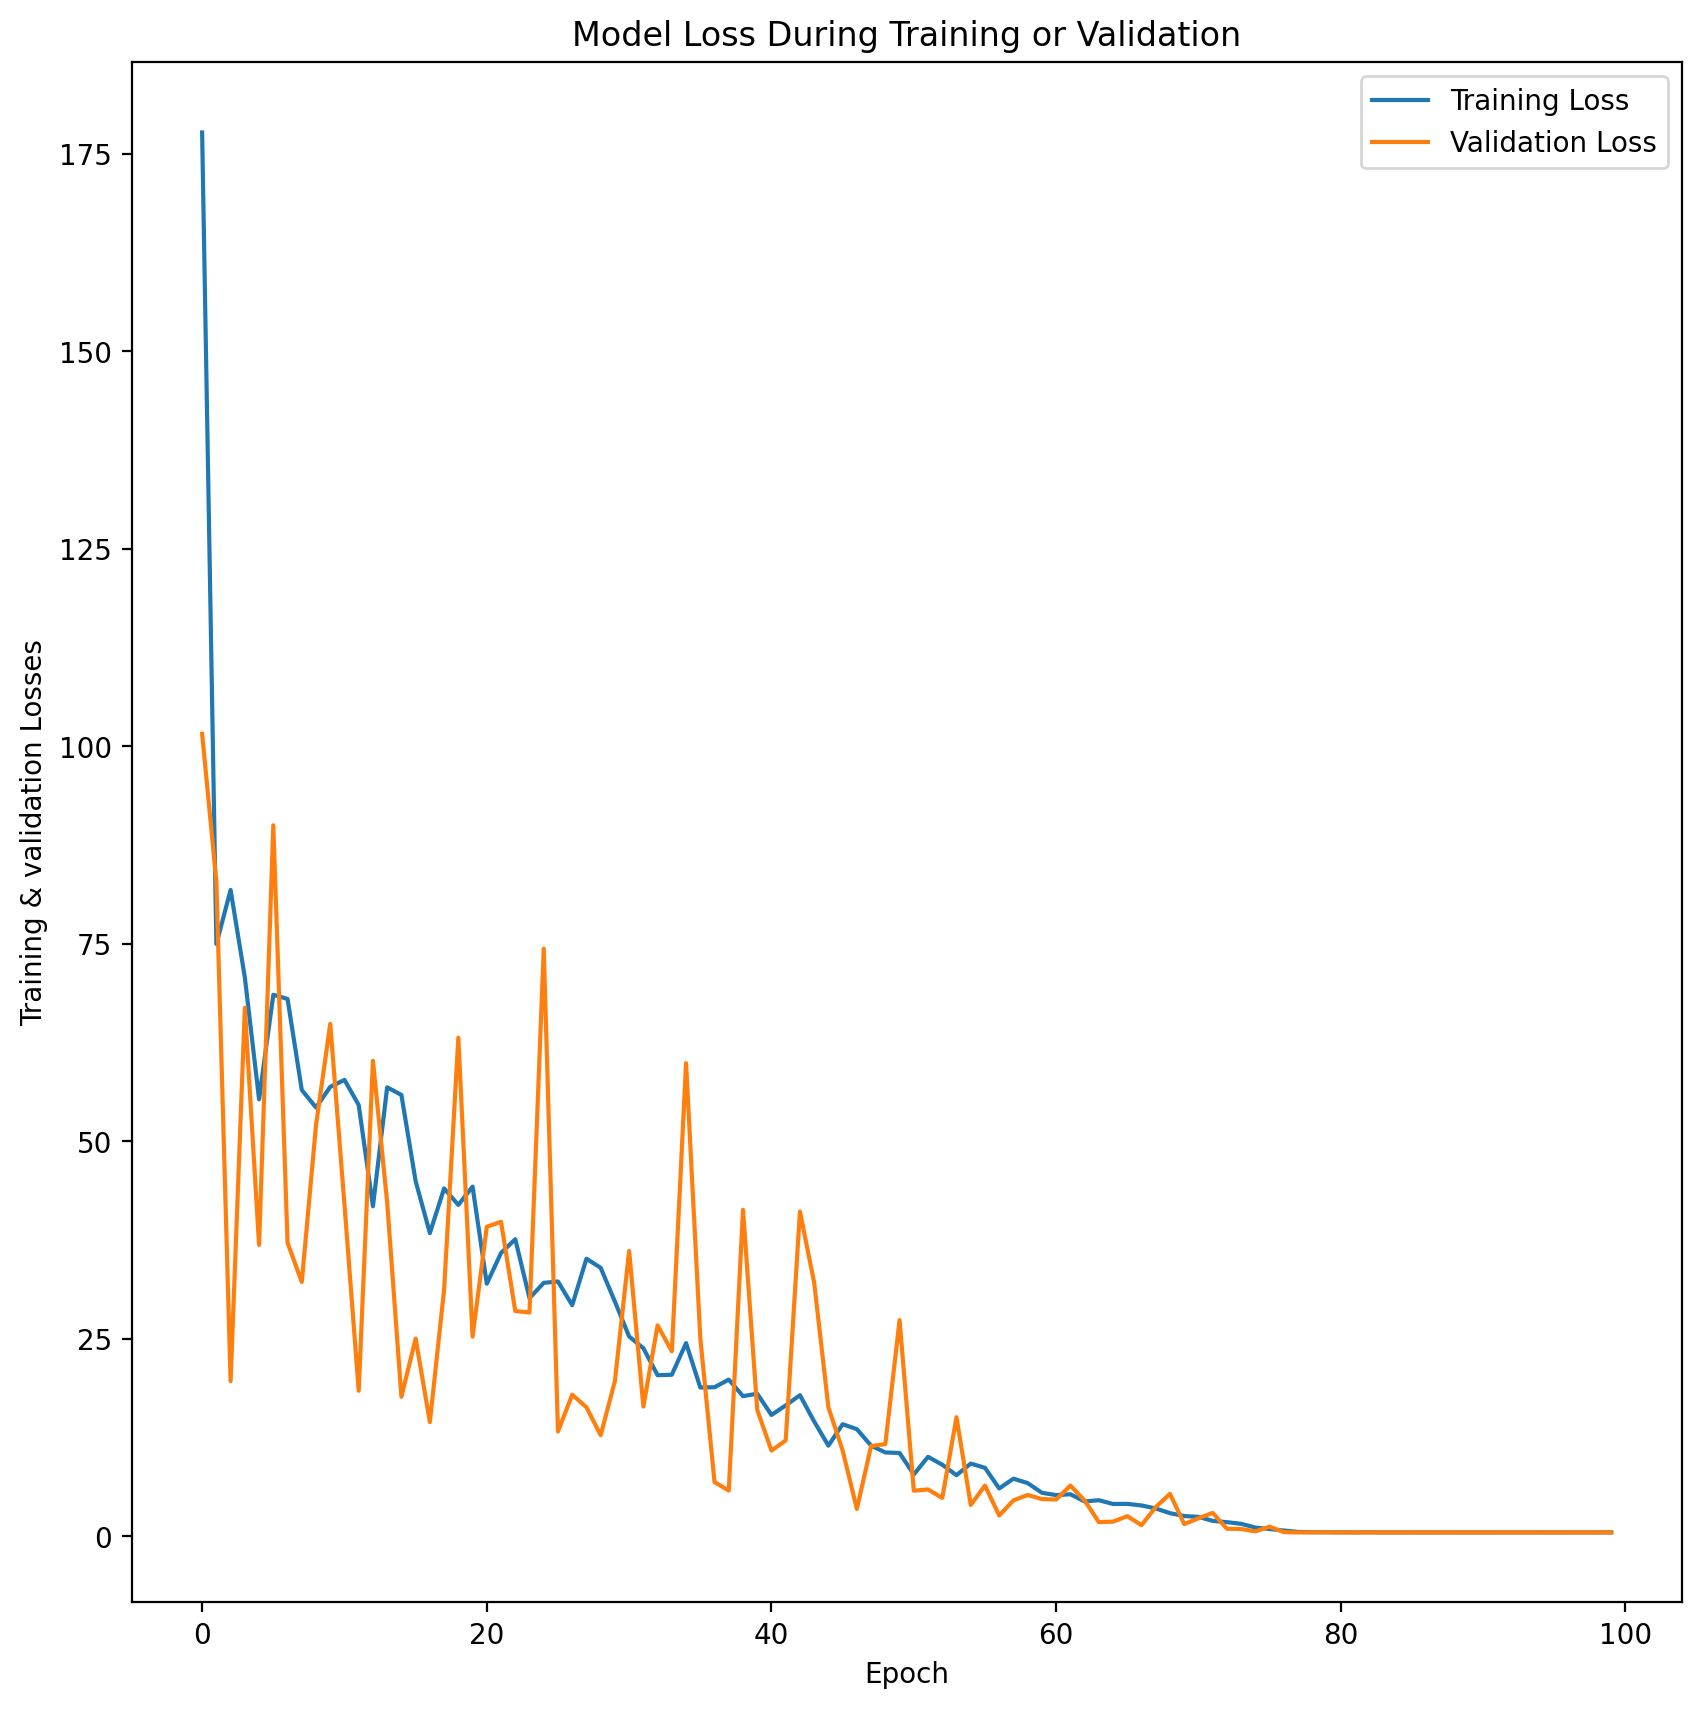

In [19]:
plt.figure(figsize=(10,10),dpi=200)
plt.plot(epochs.history["loss"])
plt.plot(epochs.history["val_loss"])
         
plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss','Validation Loss'])

In [20]:
X_random_sample = np.array([[700,1,1,45,1,0.00,4,1,1,50000.78]])
Y_predict = model.predict(X_random_sample)

1/1 [==============================] - 0s 67ms/step


2022-11-28 23:08:42.188135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [21]:
print('The Customer (0 for remained,1 for left) =',Y_predict.round())

The Customer (0 for remained,1 for left) = [[0.]]
